## Universal Gates

We learn about using **Universal Quantum Gates** and decomposing Quantum Circuits using **Gate Identities**. We also **prepare arbitrary Quantum States** and use **Grove** for shallow circuits.

$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$
$\newcommand{\bra}[1]{\left\langle{#1}\right|}$

Rigetti physically implements only three 2-qubit Gates 
$RZ(\theta)$, $RX(\frac{k\pi}{2})$, and a controlled $Z$ ($CZ$) defined as below:    

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}
\newcommand{\bra}[1]{\left\langle{#1}\right|}$$
$$R_Z(\theta) = \begin{bmatrix}
    e^{-i\frac{\theta}{2}} & 0 \\
    0 & e^{i\frac{\theta}{2}}
    \end{bmatrix}$$
    
$$R_X(\frac{k\pi}{2}) = \begin{bmatrix}
    \cos\frac{k\pi}{4} & -i\sin\frac{k\pi}{4} \\
    -i\sin\frac{k\pi}{4} & \cos\frac{k\pi}{4}
    \end{bmatrix}$$
    
$$CZ = \begin{bmatrix}
    1 & 0 & 0 & 0 \\
    0 & 1 & 0 & 0 \\
    0 & 0 & 1 & 0 \\
    0 & 0 & 0 & -1 \\
    \end{bmatrix}$$

Note: Rigetti's set of three quantum gates is universal. **Hence, any quantum circuit can be constructed from this universal set of quantum gates!**

### Pauli Gate Matrices

In [1]:
import numpy as np

pauli_I = np.matrix([[1, 0],[0, 1]])
print(f'Identity gate matrix: \n {pauli_I} \n')
pauli_X = np.matrix([[0, 1],[1, 0]])
print(f'Pauli X gate matrix: \n {pauli_X} \n')
pauli_Y = np.matrix([[0, -1j],[1j, 0]])
print(f'Pauli Y gate matrix: \n {pauli_Y} \n')
pauli_Z = np.matrix([[1, 0],[0, -1]])
print(f'Pauli Z gate matrix: \n {pauli_Z} \n')
hadamard = np.matrix([[0.707, 0.707],[0.707, -0.707]])
print(f'Hadamard gate matrix: \n {hadamard} \n')

Identity gate matrix: 
 [[1 0]
 [0 1]] 

Pauli X gate matrix: 
 [[0 1]
 [1 0]] 

Pauli Y gate matrix: 
 [[ 0.+0.j -0.-1.j]
 [ 0.+1.j  0.+0.j]] 

Pauli Z gate matrix: 
 [[ 1  0]
 [ 0 -1]] 

Hadamard gate matrix: 
 [[ 0.707  0.707]
 [ 0.707 -0.707]] 



### Gate Decomposition

Use the definitions of Rigetti's $RZ(\theta)$ and $RX(\frac{k\pi}{2})$ gates above to find a combination (product) of gates that implements the Hadamard (H) on Rigetti's QPU! As a recap here is the matrix representation of the Hadamard gate:
$$H = \frac{1}{\sqrt{2}} \begin{bmatrix}
    1 & 1 \\
    1 & -1
    \end{bmatrix}  \approx  \begin{bmatrix}
    0.707 & 0.707 \\
    0.707 & -0.707
    \end{bmatrix}$$

<a title="Try multiplying the resulting matrix with the imaginary number i (remember that global phase doesn't matter) in order to get the correct result.">Hint.</a>

In [2]:
import cmath

# manual definition of Rigetti's parametrized RZ gate. no need to modify.
rz = lambda theta: np.matrix([[cmath.exp(-1j*theta/2), 0],[0, cmath.exp(1j*theta/2)]])

# manual definition of Rigetti's parametrized RX gate. no need to modify.
rx = lambda phi: np.matrix([[cmath.cos(phi/2), -1j*cmath.sin(phi/2)],[-1j*cmath.sin(phi/2), cmath.cos(phi/2)]])

# TODO: play with these two values (theta and k)
theta = cmath.pi/2
k = 1 # must be an integer

# the angle for the RX gate is fixed to integer multiple of pi/2
phi = k*cmath.pi/2

# TODO: make different products (use 2, 3 or 4 gates)
gate_product = rz(theta)*rx(phi)*rz(theta)*1j
print(f'The chosen values are theta={theta} and k={k}\n')
print(f'The sequence of gates yields the matrix: \n \n {gate_product} \n')
print(f'Subtracting this sequence of gates from the Hadamard yields: \n \n {np.round(gate_product-hadamard)}')

The chosen values are theta=1.5707963267948966 and k=1

The sequence of gates yields the matrix: 
 
 [[ 0.70710678+1.11022302e-16j  0.70710678+0.00000000e+00j]
 [ 0.70710678+0.00000000e+00j -0.70710678+1.11022302e-16j]] 

Subtracting this sequence of gates from the Hadamard yields: 
 
 [[ 0.+0.j  0.+0.j]
 [ 0.+0.j -0.+0.j]]


**Circuit Equivalence** - This paper by [Garcia-Escartin and Chamorro-Posada](https://arxiv.org/pdf/1110.2998.pdf) is a great resource to understand the equivalence of a lot of different circuits. <br> **CNOT** can be decomposed into the below operations as shown in the following code using pyQuil library gates:<br>
$H(1)\rightarrow CZ(0,1)\rightarrow H(1)$

With control qubit OFF the resulting wavefunction is: (-0.7071067812+0j)|00> + (-0.7071067812+0j)|10>


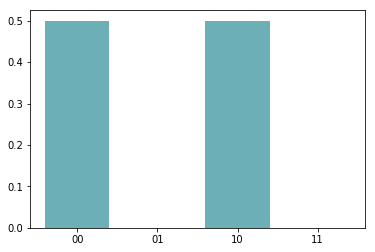

With control qubit ON the resulting wavefunction is: (-0.7071067812+0j)|01> + (-0.7071067812+0j)|11>


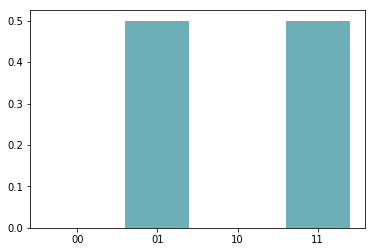

In [3]:
# from pyquil.api import CompilerConnection, get_devices
from pyquil.quil import Program
from pyquil.gates import *
from pyquil.api import QVMConnection
%matplotlib inline

# leaving the control qubit OFF (0)
p = Program()
p.inst(H(1))

# TODO: create a circuit with RX, RZ and CZ that equals a single CNOT gate
p.inst(RZ(theta, 1), RX(phi, 1), RZ(theta, 1), CZ(0,1), RZ(theta, 1), RX(phi, 1), RZ(theta, 1))

# establish connection to QVM and get wavefunction
qvm = QVMConnection()
wavefunction = qvm.wavefunction(p)
print(f'With control qubit OFF the resulting wavefunction is: {wavefunction}')
wavefunction.plot()


# turning the control qubit ON (1)
p = Program().inst(H(1), X(0))

# TODO: create a circuit with RX, RZ and CZ that equals a single CNOT gate
p.inst(RZ(theta, 1), RX(phi, 1), RZ(theta, 1), CZ(0,1), RZ(theta, 1), RX(phi, 1), RZ(theta, 1))

# establish connection to QVM and get wavefunction
qvm = QVMConnection()
wavefunction = qvm.wavefunction(p)
print(f'With control qubit ON the resulting wavefunction is: {wavefunction}')
wavefunction.plot()

### Toffoli Decomposition

In [4]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [5]:
from pyquil.gates import CCNOT
from pyquil.gates import H, T, X, CNOT
%matplotlib inline

#for initial_state in initial_states:
def Toffoli_Decomposition(x):
    initial_states = [Program().inst(X(0)), Program().inst(X(1)), Program().inst(X(2)), Program().inst(X(0), X(1)), Program().inst(X(0), X(1), X(2))]
    initial_state = initial_states[x]
    # single Toffoli
    original_toffoli = Program().inst(CCNOT(0,1,2))
    print(f"Original Toffoli result:")
    qvm.wavefunction(initial_state + original_toffoli).plot()
    
    # decomposed Toffoli
    t_dagger = np.array([[1, 0], [ 0, cmath.exp(-1j*cmath.pi/4)]])
    decomposed_toffoli = Program().defgate("T_dagger", t_dagger) # register T_dagger
    decomposed_toffoli.inst(H(2), CNOT(1,2), ("T_dagger", 2), CNOT(0,2), T(2))
    decomposed_toffoli.inst(CNOT(1,2), ("T_dagger", 2), CNOT(0,2), T(1), T(2), H(2))
    decomposed_toffoli.inst(CNOT(0,1), T(0), ("T_dagger", 1), CNOT(0,1))
    print(f"Decomposed Toffoli result:")
    qvm.wavefunction(initial_state + decomposed_toffoli).plot()

In [6]:
interact(Toffoli_Decomposition, x=(0,3));

interactive(children=(IntSlider(value=1, description='x', max=3), Output()), _dom_classes=('widget-interact',)…

## Quantum State Preparation

The goal of quantum state preparation is the ability to generate quantum states with arbitrary amplitude distributions. Formally speaking, given a complex non-zero amplitude vector $\mathbf{a} \in \mathbb{C}^N$ with components $a_i$ find an algorithm that takes the initial state $\ket{0}^{\otimes \log_2 N}$ and outputs the following state:
$$\ket{\Psi} = \sum^{N-1}_{i=0} \frac{a_i}{\mid \mathbf{a} \mid} \ket{i}$$
where $\ket{i}$ stands for $i$ in its binary representation.

**Example**: Prepare the following quantum state:

$$ \ket{\Psi} = \frac{-i}{2} \, \ket{00} - \frac{i}{2} \, \ket{01} + \frac{i}{2} \, \ket{10} + \frac{i}{2} \,\ket{11} $$


In [7]:
from pyquil.api import QVMConnection
from pyquil.gates import CNOT, H, Z, Y
from pyquil.quil import Program

qvm = QVMConnection()
p = Program()

# TODO: initialize the quantum state with quantum gates
p.inst(H(0), H(1), Y(1))

print(qvm.wavefunction(p))
#qvm.wavefunction(p).plot()

-0.5j|00> + -0.5j|01> + 0.5j|10> + 0.5j|11>


**Example**: Built a quantum circuit with a conditional measurement to construct the following quantum state:

$$ \ket{\Psi} = -\frac{1}{2} \,|001> -  \, \frac{1}{2} \,|011> + \, \frac{1}{2} \,|101> + \, \frac{1}{2} \,|111> $$

<a title="Look at the if_then() function to access the shared memory in order to perform a conditional measurement.">Hint.</a>

(-0.5+0j)|001> + (-0.5+0j)|011> + (-0.5+0j)|101> + (-0.5+0j)|111>


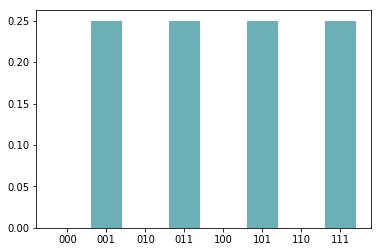

In [8]:
from pyquil.api import QVMConnection
from pyquil.gates import CNOT, H, Z, CCNOT, X, CZ, I
from pyquil.quil import Program

qvm = QVMConnection()
p = Program()

# TODO: initialize the quantum state with quantum gates
then_branch = Program()
else_branch = Program(X(0))

p.inst(H(0), H(1), H(2)).inst(CZ(0,2)).inst(X(0)).measure(0,0)
p.if_then(0, then_branch, else_branch).inst(Z(0),Z(2))

print(qvm.wavefunction(p))
qvm.wavefunction(p).plot()

### Generating LaTex code for circuits from the pyQuil Program

In [9]:
from pyquil.latex.latex_generation import to_latex

In [10]:
#latex_circuit=to_latex(p)

**NOTE**: The string above has a compilable LaTex source code. However, this is not foolproof yet. For Gate count more than 5, it doesn't compile. Similarly, there is nothing to compile Classical Control Flow into circuit diagrams

## Grove library of Quantum Algorithms

Assumes grove has been cloned and installed

In [11]:
# TODO: Use Grove to generate the two arbitrary states as above
from grove.alpha.arbitrary_state.arbitrary_state import create_arbitrary_state

# generating circuit for quantum state 1
amplitude_vector = [-1j/2, -1j/2, 1j/2, 1j/2]
p = create_arbitrary_state(amplitude_vector)
print(f'Generated wavefunction for state 1: \n{qvm.wavefunction(p)} \n')
print(f'Quantum circuit used to generate the state: \n{p}')


# generating circuit for quantum state 2
amplitude_vector = [0, -1/2, 0, -1/2, 0, 1/2, 0, 1/2]
p = create_arbitrary_state(amplitude_vector)
print(f'Generated wavefunction for state 2: \n{qvm.wavefunction(p)} \n')
print(f'Quantum circuit used to generate the state: \n{p}')

Generated wavefunction for state 1: 
-0.5j|00> + -0.5j|01> + 0.5j|10> + 0.5j|11> 

Quantum circuit used to generate the state: 
RZ(0) 0
PHASE(0) 0
H 0
H 1
RZ(pi) 0
SWAP 0 1
CNOT 1 0
CNOT 1 0
CNOT 1 0
CNOT 1 0

Generated wavefunction for state 2: 
(-0.5+0j)|001> + (-0.5+0j)|011> + (0.5+0j)|101> + (0.5+0j)|111> 

Quantum circuit used to generate the state: 
RZ(-pi/2) 0
PHASE(pi/2) 0
H 0
H 1
H 2
RZ(-pi/2) 0
SWAP 0 2
CNOT 2 0
CNOT 2 0
CNOT 2 0
CNOT 2 0
SWAP 0 1
CNOT 2 0
CNOT 1 0
CNOT 2 0
CNOT 1 0
RY(1.5707963267948963) 0
CNOT 2 0
RZ(pi/2) 0
CNOT 1 0
CNOT 2 0
CNOT 1 0
RZ(pi/2) 0



## Quantum Simulations

### Errors in Quantum Circuits

**Example** - **Phase Flip Errors**<br>
Phase flip errors propagate upwards through CNOT gates. Verify this statement by implementing a short circuit that:

- initializes an equal superposition over all 2-qubit strings,
- applies a phase (Z) gate to one of the qubits,
- applies a CNOT gate to the two qubits,
- observe how the phase flip propagates.

In [12]:
from pyquil.api import QVMConnection
from pyquil.gates import CNOT, H, Z
from pyquil.quil import Program

qvm = QVMConnection()

for i in range(2):
    p = Program()
    p.inst(H(0), H(1))
    p.inst(Z(i))
    p.inst(CNOT(0,1))
    
    print(f'Acting Z on qubit {i} yields: \n{qvm.wavefunction(p)}\n\n')

Acting Z on qubit 0 yields: 
(0.5+0j)|00> + (-0.5+0j)|01> + (0.5+0j)|10> + (-0.5+0j)|11>


Acting Z on qubit 1 yields: 
(0.5+0j)|00> + (-0.5+0j)|01> + (-0.5+0j)|10> + (0.5+0j)|11>




The resulting quantum states are **product states** and can be separated into two components:

In the case of where we apply $Z$ to qubit 0 we get:

$$\frac{1}{2}\,\ket{00} - \frac{1}{2}\,\ket{01} + \frac{1}{2}\,\ket{10} - \frac{1}{2}\,\ket{11} = \frac{1}{\sqrt{2}} (\ket{0} + \ket{1}) \otimes \frac{1}{\sqrt{2}} (\ket{0} - \ket{1})$$

From this it becomes evident that the phase shift of $-1$ was only applied to qubit 0 (the latter - remember the reverse qubit ordering!).

However, in the case of where we apply $Z$ to qubit 1 we get:

$$\frac{1}{2}\,\ket{00} - \frac{1}{2}\,\ket{01} - \frac{1}{2}\,\ket{10} + \frac{1}{2}\,\ket{11} = \frac{1}{\sqrt{2}} (\ket{0} - \ket{1}) \otimes \frac{1}{\sqrt{2}} (\ket{0} - \ket{1})$$

which clearly shows that the phase shift was applied to both qubits! Hence, the phase shift ($Z$) error propagated upwards through the CNOT gate!

### Simulating Many-Body Interactions

We can exploit the fact that phase flip errors propagate upwards to simulate local Hamiltonians with many-body interactions such as:

$$ H = \pi \big( Z_0 \otimes Z_1 \otimes Z_2 \big) $$

In [13]:
# TODO: simulate the Hamiltonian above
from pyquil.gates import CNOT, RZ

p = Program([CNOT(0,2), CNOT(1,2), RZ(cmath.pi, 2) ,CNOT(1,2), CNOT(0,2)])

print(qvm.wavefunction(p))

-1j|000>


## Quantum Fourier Transform

We write a program to compute the 3-qubit QFT. The circuit consists of H gates and CPHASE gates followed by a SWAP.

<img src=3QubitQFT.png>

In [14]:
from math import pi
from pyquil.quil import Program
from pyquil.gates import *
from pyquil.api import QVMConnection


qvm=QVMConnection()

#qft3 creates Quil code to perform a 3-qubit QFT
def qft3(q0, q1, q2):
    p = Program()
    p.inst( H(q2),
            CPHASE(pi/2.0, q1, q2),
            H(q1),
            CPHASE(pi/4.0, q0, q2),
            CPHASE(pi/2.0, q0, q1),
            H(q0),
            SWAP(q0, q2) )
    return p

#state-preparation
state_prep = Program().inst(X(0))
add_dummy_qubits = Program().inst(I(1), I(2))
wavefunction = qvm.wavefunction(state_prep + add_dummy_qubits)
#print(wavefunction)

#invoke QFT3
wavefunction = qvm.wavefunction(state_prep + qft3(0, 1, 2))
print(wavefunction.amplitudes)
#wavefunction.plot()

[ 3.53553391e-01+0.j          2.50000000e-01+0.25j
  2.16489014e-17+0.35355339j -2.50000000e-01+0.25j
 -3.53553391e-01+0.j         -2.50000000e-01-0.25j
 -2.16489014e-17-0.35355339j  2.50000000e-01-0.25j      ]


Cross-check with classical Inverse FFT

In [15]:
from numpy.fft import ifft
print(ifft([0,1,0,0,0,0,0,0], norm="ortho"))

[ 0.35355339+0.j          0.25      +0.25j        0.        +0.35355339j
 -0.25      +0.25j       -0.35355339+0.j         -0.25      -0.25j
  0.        -0.35355339j  0.25      -0.25j      ]


### QFT from Grove library of Algorithms

In [16]:
import grove

In [17]:
from grove.qft.fourier import bit_reversal, inverse_qft, qft

In [18]:
def execute(quil_program, trials=100, silent=False, raw=False):
    """
    Thin function that takes a low-level Quil program and returns the
    resulting probability distribution.
    """

    qvm = QVMConnection()
    results = qvm.run(Program(quil_program), trials=trials)
    results = list(map(tuple, results))

    if not silent:
        observed_results = set(results)
        for result in sorted(observed_results):
            bitstring = ''.join(reversed(list(map(str, result))))
            print(f'|{bitstring}> state: {results.count(result)/len(results)} [{results.count(result)}/{len(results)}]')
        if raw:
            print(f'Results: {results}')

def plot(quil_program):
    qvm = QVMConnection()
    return qvm.wavefunction(Program(quil_program)).plot()   

In [19]:
prog_qft =  qft([0, 1, 2])

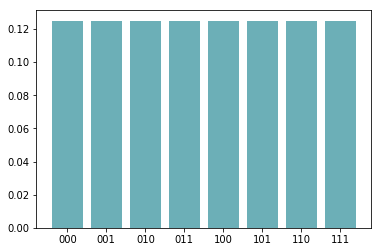

In [20]:
plot(prog_qft)

In [21]:
print(prog_qft)

H 2
CPHASE(pi/2) 1 2
H 1
CPHASE(pi/4) 0 2
CPHASE(pi/2) 0 1
H 0
SWAP 0 2

